<a href="https://colab.research.google.com/github/zaynabhassan/CNN/blob/main/Hassan_ConVNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file {name} with length {lenth} bytes'.format(name=fn, lenth= len(uploaded[fn])))

Saving eye_gender_data.zip to eye_gender_data.zip
User uploaded file eye_gender_data.zip with length 26794203 bytes


In [ ]:
#unzipping file
!unzip eye_gender_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: eye_gender_data/train/Image_48.jpg  
  inflating: eye_gender_data/train/Image_480.jpg  
  inflating: eye_gender_data/train/Image_4800.jpg  
  inflating: eye_gender_data/train/Image_4801.jpg  
  inflating: eye_gender_data/train/Image_4802.jpg  
  inflating: eye_gender_data/train/Image_4803.jpg  
  inflating: eye_gender_data/train/Image_4804.jpg  
  inflating: eye_gender_data/train/Image_4805.jpg  
  inflating: eye_gender_data/train/Image_4806.jpg  
  inflating: eye_gender_data/train/Image_4807.jpg  
  inflating: eye_gender_data/train/Image_4808.jpg  
  inflating: eye_gender_data/train/Image_4809.jpg  
  inflating: eye_gender_data/train/Image_481.jpg  
  inflating: eye_gender_data/train/Image_4810.jpg  
  inflating: eye_gender_data/train/Image_4811.jpg  
  inflating: eye_gender_data/train/Image_4812.jpg  
  inflating: eye_gender_data/train/Image_4813.jpg  
  inflating: eye_gender_data/train/Image_4814.jpg  
  inflating: eye_

In [ ]:
# Data Preparation on training data
labels = pd.read_csv("/content/eye_gender_data/Training_set.csv") # loading the labels
file_paths = [[fname, '/content/eye_gender_data/train/' + fname] for fname in labels['filename']]


In [ ]:
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

train_data.head()

,filename,filepaths,label
0,Image_1.jpg,/content/eye_gender_data/train/Image_1.jpg,male
1,Image_2.jpg,/content/eye_gender_data/train/Image_2.jpg,female
2,Image_3.jpg,/content/eye_gender_data/train/Image_3.jpg,female
3,Image_4.jpg,/content/eye_gender_data/train/Image_4.jpg,female
4,Image_5.jpg,/content/eye_gender_data/train/Image_5.jpg,male


In [ ]:
train_data.tail()

,filename,filepaths,label
9215,Image_9216.jpg,/content/eye_gender_data/train/Image_9216.jpg,male
9216,Image_9217.jpg,/content/eye_gender_data/train/Image_9217.jpg,male
9217,Image_9218.jpg,/content/eye_gender_data/train/Image_9218.jpg,male
9218,Image_9219.jpg,/content/eye_gender_data/train/Image_9219.jpg,male
9219,Image_9220.jpg,/content/eye_gender_data/train/Image_9220.jpg,female


In [ ]:
train_data.shape

(9220, 3)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9220 entries, 0 to 9219
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   9220 non-null   object
 1   filepaths  9220 non-null   object
 2   label      9220 non-null   object
dtypes: object(3)
memory usage: 288.1+ KB


In [ ]:
#Encoding categorical feature
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

train_data['label']= encoder.fit_transform(train_data['label'])

In [ ]:
train_data['label'].value_counts()

1    5058
0    4162
Name: label, dtype: int64

In [ ]:
len(train_data['filepaths'])

9220

In [ ]:
#Loading image array in grayscale
image_array= []
for i in range(len(train_data['filepaths'])):

  img_arr = cv2.imread(train_data['filepaths'][i], 0) 
  image_array.append(img_arr)
print(len(image_array))  

9220


In [ ]:
print('The shape of image 0 array is', image_array[0].shape)
print('Image 0 array is', image_array[0])

The shape of image 0 array is (53, 53)
Image 0 array is [[188 189 190 ... 180 177 175]
 [190 187 185 ... 173 167 165]
 [189 182 179 ... 172 165 161]
 ...
 [136 148 150 ... 164 165 163]
 [133 146 151 ... 170 169 167]
 [135 148 156 ... 166 164 162]]


In [ ]:
#Resizing images array to a unified shape
data= []
for i in range(len(image_array)):

  resized_array= cv2.resize(image_array[i], (100,100))
  data.append(resized_array)

In [ ]:
print(len(data))

9220


In [ ]:
data[0].shape

(100, 100)

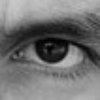

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(data[0])

# waiting for key event
cv2.waitKey(0)

# destroying all windows
cv2.destroyAllWindows()

In [ ]:
#Separating feature and label
x= data
y= train_data['label']

In [ ]:
x

[array([[188, 188, 189, ..., 176, 175, 175],
        [189, 189, 188, ..., 174, 173, 172],
        [190, 189, 188, ..., 168, 167, 167],
        ...,
        [133, 137, 144, ..., 168, 167, 166],
        [134, 138, 145, ..., 165, 164, 163],
        [135, 139, 146, ..., 163, 162, 162]], dtype=uint8),
 array([[167, 169, 173, ..., 194, 195, 195],
        [168, 170, 173, ..., 193, 194, 195],
        [171, 171, 173, ..., 192, 193, 194],
        ...,
        [183, 185, 189, ..., 199, 197, 196],
        [183, 186, 189, ..., 199, 197, 195],
        [184, 186, 190, ..., 199, 196, 195]], dtype=uint8),
 array([[181, 179, 177, ..., 131, 134, 136],
        [178, 177, 174, ..., 127, 127, 128],
        [174, 172, 170, ..., 120, 118, 116],
        ...,
        [126, 128, 132, ...,  99,  96,  94],
        [127, 130, 133, ...,  98,  95,  93],
        [128, 131, 135, ...,  98,  94,  92]], dtype=uint8),
 array([[ 98,  97,  97, ..., 185, 186, 187],
        [100,  99,  98, ..., 184, 186, 187],
        [103, 10

In [ ]:
#converting to array as x is a list and y is a df
x= np.array(x)
y=np.array(y)

In [ ]:
print(x[0])
print(x[0].shape)
print(y[0])

[[188 188 189 ... 176 175 175]
 [189 189 188 ... 174 173 172]
 [190 189 188 ... 168 167 167]
 ...
 [133 137 144 ... 168 167 166]
 [134 138 145 ... 165 164 163]
 [135 139 146 ... 163 162 162]]
(100, 100)
1


In [ ]:
print(len(x), len(y))

9220 9220


In [ ]:
np.unique(y, return_counts= True)

(array([0, 1]), array([4162, 5058]))

In [ ]:
x= x.reshape(-1,100, 100, 1)

In [ ]:
x.shape

(9220, 100, 100, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.25, random_state=42)

In [ ]:
x_train.shape

(6915, 100, 100, 1)

In [ ]:
x_train[50]

array([[157, 145, 127, ..., 163, 163, 163],
       [160, 149, 132, ..., 163, 163, 163],
       [164, 154, 139, ..., 164, 163, 163],
       ...,
       [104, 105, 106, ..., 185, 182, 180],
       [105, 105, 106, ..., 186, 182, 180],
       [105, 105, 106, ..., 187, 183, 180]], dtype=uint8)

In [ ]:
x_test[0]

array([[233, 233, 232, ..., 135, 152, 162],
       [230, 230, 230, ..., 134, 141, 146],
       [223, 225, 228, ..., 132, 123, 117],
       ...,
       [221, 221, 221, ..., 218, 221, 223],
       [221, 222, 223, ..., 220, 224, 226],
       [221, 222, 223, ..., 220, 225, 228]], dtype=uint8)

In [ ]:
y_train.shape

(6915,)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3132, 3783]))

In [ ]:
#Building Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 20)        200       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 20)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 10)        1810      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 10)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5290)              0         
                                                                 
 dense_12 (Dense)            (None, 30)               

In [ ]:
history= model.fit(x_train, y_train, batch_size=100 , epochs= 10, 
          verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
70/70 [==============================] - 46s 654ms/step - loss: 1.2039 - accuracy: 0.5477 - val_loss: 0.6922 - val_accuracy: 0.5479
Epoch 2/10
70/70 [==============================] - 46s 664ms/step - loss: 0.6917 - accuracy: 0.5488 - val_loss: 0.6912 - val_accuracy: 0.5479
Epoch 3/10
70/70 [==============================] - 45s 640ms/step - loss: 0.6908 - accuracy: 0.5488 - val_loss: 0.6904 - val_accuracy: 0.5479
Epoch 4/10
70/70 [==============================] - 45s 639ms/step - loss: 0.6900 - accuracy: 0.5488 - val_loss: 0.6897 - val_accuracy: 0.5479
Epoch 5/10
70/70 [==============================] - 45s 639ms/step - loss: 0.6895 - accuracy: 0.5488 - val_loss: 0.6893 - val_accuracy: 0.5479
Epoch 6/10
70/70 [==============================] - 45s 639ms/step - loss: 0.6891 - accuracy: 0.5488 - val_loss: 0.6890 - val_accuracy: 0.5479
Epoch 7/10
70/70 [==============================] - 45s 639ms/step - loss: 0.6888 - accuracy: 0.5488 - val_loss: 0.6888 - val_accuracy: 0.5479

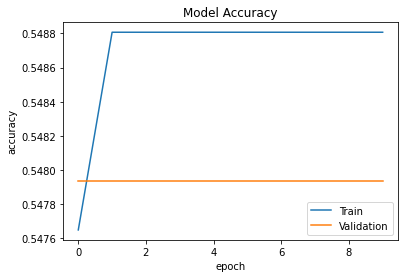

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
#Testing data preparation
test_image = pd.read_csv("/content/eye_gender_data/Testing_set.csv")
test_file_paths = [[fname, '/content/eye_gender_data/test/' + fname] for fname in test_image['filename']]

print(len(test_image),len(test_file_paths))

2305 2305


In [ ]:
test_images = pd.DataFrame(test_file_paths, columns=['filename', 'filepaths'])
test_images.head()

,filename,filepaths
0,Image_1.jpg,/content/eye_gender_data/test/Image_1.jpg
1,Image_2.jpg,/content/eye_gender_data/test/Image_2.jpg
2,Image_3.jpg,/content/eye_gender_data/test/Image_3.jpg
3,Image_4.jpg,/content/eye_gender_data/test/Image_4.jpg
4,Image_5.jpg,/content/eye_gender_data/test/Image_5.jpg


In [ ]:
test_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   2305 non-null   object
 1   filepaths  2305 non-null   object
dtypes: object(2)
memory usage: 36.1+ KB


In [ ]:
#Loading image array in grayscale
test_image_array= []
for i in range(len(test_images['filepaths'])):

  test_img_arr = cv2.imread(test_images['filepaths'][i], 0) 
  test_image_array.append(test_img_arr)
print(len(test_image_array))  

2305


In [ ]:
test_image_array[20]

array([[235, 233, 232, ...,  67,  87,  84],
       [225, 227, 231, ...,  67,  84,  81],
       [237, 241, 242, ...,  69,  84,  81],
       ...,
       [192, 180, 162, ..., 208, 200, 187],
       [192, 178, 161, ..., 205, 194, 179],
       [191, 174, 159, ..., 204, 190, 172]], dtype=uint8)

In [ ]:
#Resizing image arrays to a unified shape
test_data= []
for i in range(len(test_image_array)):

  test_resized_array= cv2.resize(test_image_array[i], (100,100))
  test_data.append(test_resized_array)

In [ ]:
test_data[20].shape

(100, 100)

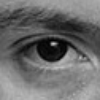

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(test_data[0])

# waiting for key event
cv2.waitKey(0)

# destroying all windows
cv2.destroyAllWindows()

In [ ]:
len(test_data)

2305

In [ ]:
test_data= np.array(test_data)

In [ ]:
Test_data= test_data.reshape(-1,100, 100, 1)

In [ ]:
Test_data.shape

(2305, 100, 100, 1)

In [ ]:
#Predictions
pred= model.predict(Test_data)

In [ ]:
prediction = []
for value in pred:
  prediction.append(np.argmax(value))

In [ ]:
predictions = encoder.inverse_transform(prediction)

In [ ]:
predictions[0]

'female'

In [ ]:
Result = pd.DataFrame({'filename': test_images['filename'], 'label': predictions})  
Result.to_csv("submission.csv", index = False) 

In [ ]:
from google.colab import files        
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>